# Exploratory Data Analysis

## 1. Data loading and baseline overview

In [40]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import matplotlib.ticker as mtick

In [2]:
# Loading data
df = pd.read_csv("../data/clean/clean_dataset.csv",sep=";",encoding="utf-8")

In [3]:
df.shape

(103904, 24)

In [4]:
df.head()

,id,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,...,inflight_entertainment,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18,Neutral Or Dissatisfied
1,5047,Male,Disloyal Customer,25,Business Travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6,Neutral Or Dissatisfied
2,110028,Female,Loyal Customer,26,Business Travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0,Satisfied
3,24026,Female,Loyal Customer,25,Business Travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9,Neutral Or Dissatisfied
4,119299,Male,Loyal Customer,61,Business Travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0,Satisfied


In [5]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype
---  ------                             --------------   -----
 0   id                                 103904 non-null  int64
 1   gender                             103904 non-null  str  
 2   customer_type                      103904 non-null  str  
 3   age                                103904 non-null  int64
 4   type_of_travel                     103904 non-null  str  
 5   class                              103904 non-null  str  
 6   flight_distance                    103904 non-null  int64
 7   inflight_wifi_service              103904 non-null  int64
 8   departure_arrival_time_convenient  103904 non-null  int64
 9   ease_of_online_booking             103904 non-null  int64
 10  gate_location                      103904 non-null  int64
 11  food_and_drink                     103904 non-null  int64
 12  online_boardi

In [6]:
# checking the satisfaction rate as the target variable
df["satisfaction"].value_counts()

satisfaction
Neutral Or Dissatisfied    58879
Satisfied                  45025
Name: count, dtype: int64

In [7]:
df["satisfaction"].value_counts(normalize=True)

satisfaction
Neutral Or Dissatisfied    0.566667
Satisfied                  0.433333
Name: proportion, dtype: float64

In [9]:
# Define figures directory
FIGURES_DIR = Path(r"C:\Users\ghaza\Desktop\Airline_Passenger_Satisfaction_Project\figures")

# Create folder if it does not exist
FIGURES_DIR.mkdir(parents=True, exist_ok=True)

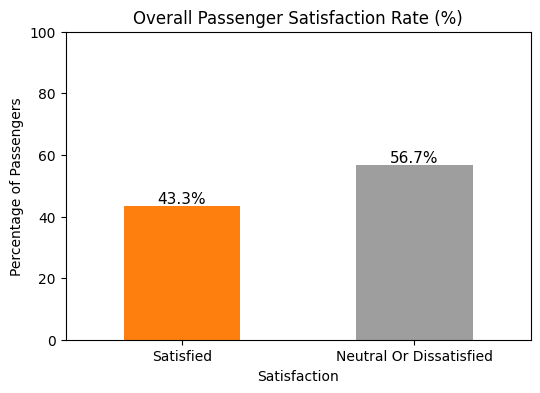

In [10]:
# Calculate percentages
satisfaction_pct = (
    df["satisfaction"]
    .value_counts(normalize=True)
    .mul(100)
)

# Reorder categories (important for colors)
satisfaction_pct = satisfaction_pct[["Satisfied", "Neutral Or Dissatisfied"]]

# Plot
ax = satisfaction_pct.plot(
    kind="bar",
    color=["#ff7f0e", "#9e9e9e"],  # orange, gray
    figsize=(6, 4)
)

# Add percentage labels on top of bars
for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.1f}%",
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha="center",
        va="bottom",
        fontsize=11
    )

# Formatting
plt.title("Overall Passenger Satisfaction Rate (%)")
plt.xlabel("Satisfaction")
plt.ylabel("Percentage of Passengers")
plt.ylim(0, 100)
plt.xticks(rotation=0)

file_path = FIGURES_DIR / "overall_passenger_satisfaction_rate.png"
plt.savefig(file_path, dpi=300, bbox_inches="tight")

plt.show()


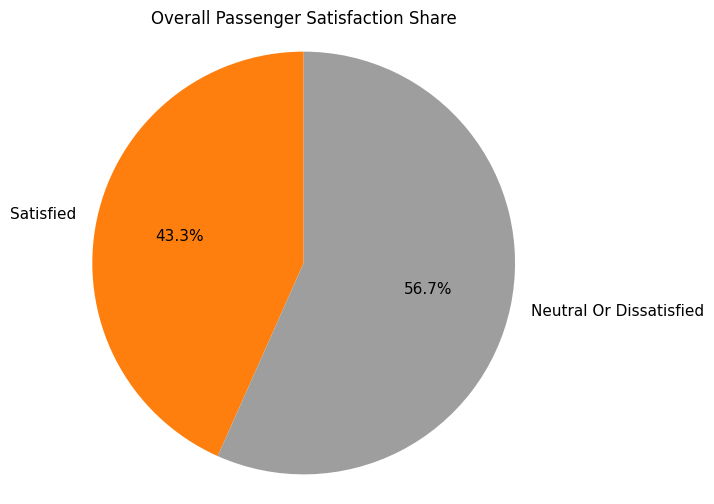

In [11]:
# percentages
satisfaction_pct = (
    df["satisfaction"]
    .value_counts(normalize=True)
    .mul(100)
)

labels = ["Satisfied", "Neutral Or Dissatisfied"]
sizes = [
    satisfaction_pct["Satisfied"],
    satisfaction_pct["Neutral Or Dissatisfied"]
]

colors = ["#ff7f0e", "#9e9e9e"]

fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(
    sizes,
    labels=labels,
    autopct="%.1f%%",
    startangle=90,
    colors=colors,
    textprops={"fontsize": 11}
)
ax.set_title("Overall Passenger Satisfaction Share")
ax.axis("equal")

file_path = FIGURES_DIR / "overall_passenger_satisfaction_share.png"
plt.savefig(file_path, dpi=300, bbox_inches="tight")

plt.show()


**Result:** The baseline analysis shows that only 43.3% of passengers report being satisfied, while 56.7% are neutral or dissatisfied, indicating significant room for improvement in overall passenger experience.

## 2. Target variable and feature groups preparation

### Defining satisfaction as target variable binary

Satisfaction will be converted into a binary variable to reflect a real-world decision context where airlines primarily need to distinguish between satisfied passengers and those at risk of dissatisfaction for analysis and action.

In [12]:
#creating binary target variable
df["satisfied"] = df["satisfaction"].map({
    "Satisfied": 1,
    "Neutral Or Dissatisfied": 0
})

In [13]:
#validating
df[["satisfaction", "satisfied"]].head()

,satisfaction,satisfied
0,Neutral Or Dissatisfied,0
1,Neutral Or Dissatisfied,0
2,Satisfied,1
3,Neutral Or Dissatisfied,0
4,Satisfied,1


In [14]:
df["satisfaction"].unique()

<StringArray>
['Neutral Or Dissatisfied', 'Satisfied']
Length: 2, dtype: str

In [15]:
df["satisfied"].isna().sum()

np.int64(0)

In [16]:
df["satisfied"].value_counts(normalize=True)

satisfied
0    0.566667
1    0.433333
Name: proportion, dtype: float64

the satisfaction percentage matches the previous number!

In [17]:
df.columns

Index(['id', 'gender', 'customer_type', 'age', 'type_of_travel', 'class',
       'flight_distance', 'inflight_wifi_service',
       'departure_arrival_time_convenient', 'ease_of_online_booking',
       'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort',
       'inflight_entertainment', 'on-board_service', 'leg_room_service',
       'baggage_handling', 'checkin_service', 'inflight_service',
       'cleanliness', 'departure_delay_in_minutes', 'arrival_delay_in_minutes',
       'satisfaction', 'satisfied'],
      dtype='str')

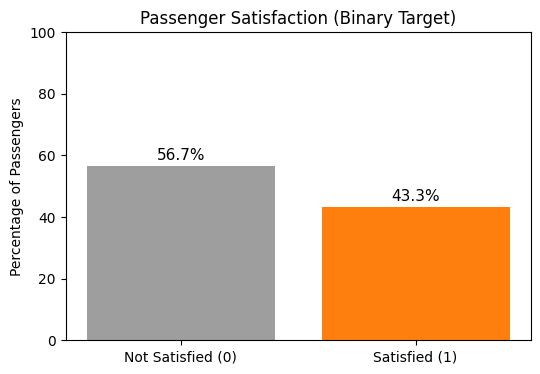

In [18]:
target_pct = (
    df["satisfied"]
    .value_counts(normalize=True)
    .sort_index()        # ensures order: 0 then 1
) * 100

labels = ["Not Satisfied (0)", "Satisfied (1)"]
colors = ["#9e9e9e", "#ff7f0e"]  # gray, orange

fig, ax = plt.subplots(figsize=(6, 4))
bars = ax.bar(labels, target_pct.values, color=colors)

for bar in bars:
    h = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, h + 1, f"{h:.1f}%", ha="center", va="bottom", fontsize=11)

ax.set_title("Passenger Satisfaction (Binary Target)")
ax.set_ylabel("Percentage of Passengers")
ax.set_ylim(0, 100)

file_path = FIGURES_DIR / "binary_target_satisfaction_distribution.png"
plt.savefig(file_path, dpi=300, bbox_inches="tight")

plt.show()


## 3. Global EDA

In [19]:
df.isna().sum().sort_values(ascending=False)

id                                   0
gender                               0
customer_type                        0
age                                  0
type_of_travel                       0
class                                0
flight_distance                      0
inflight_wifi_service                0
departure_arrival_time_convenient    0
ease_of_online_booking               0
gate_location                        0
food_and_drink                       0
online_boarding                      0
seat_comfort                         0
inflight_entertainment               0
on-board_service                     0
leg_room_service                     0
baggage_handling                     0
checkin_service                      0
inflight_service                     0
cleanliness                          0
departure_delay_in_minutes           0
arrival_delay_in_minutes             0
satisfaction                         0
satisfied                            0
dtype: int64

### Age distribution

In [20]:
ORANGE = "#ff7f0e"

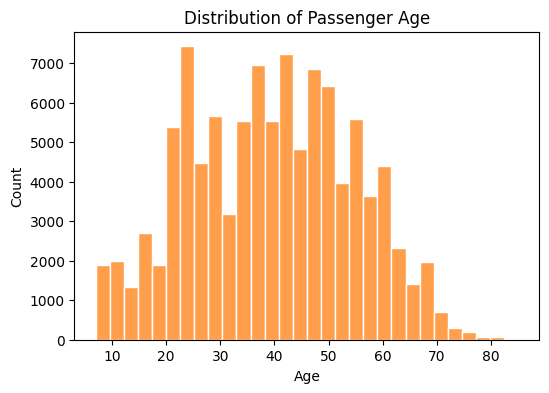

In [21]:
plt.figure(figsize=(6, 4))

sns.histplot(
    df["age"],
    bins=30,
    color=ORANGE,
    edgecolor="white"
)

plt.title("Distribution of Passenger Age")
plt.xlabel("Age")
plt.ylabel("Count")

file_path = FIGURES_DIR / "age_distribution.png"
plt.savefig(file_path, dpi=300, bbox_inches="tight")
plt.show()


**Result**: Passenger ages are broadly distributed, with most travelers between 20 and 60 years old, indicating a realistic and representative age profile.

### Flight distance distribution

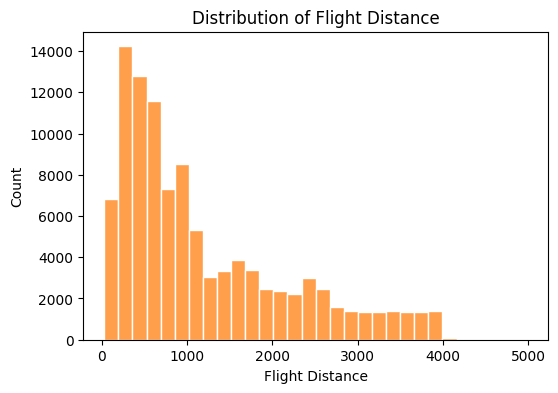

In [22]:
plt.figure(figsize=(6, 4))

sns.histplot(
    df["flight_distance"],
    bins=30,
    color=ORANGE,
    edgecolor="white"
)

plt.title("Distribution of Flight Distance")
plt.xlabel("Flight Distance")
plt.ylabel("Count")

file_path = FIGURES_DIR / "flight_distance_distribution.png"
plt.savefig(file_path, dpi=300, bbox_inches="tight")
plt.show()


**Result**: Flight distance is strongly right-skewed, with the majority of journeys being short to medium haul and a smaller number of long-haul flights forming a long tail.

### Arrival delay distribution

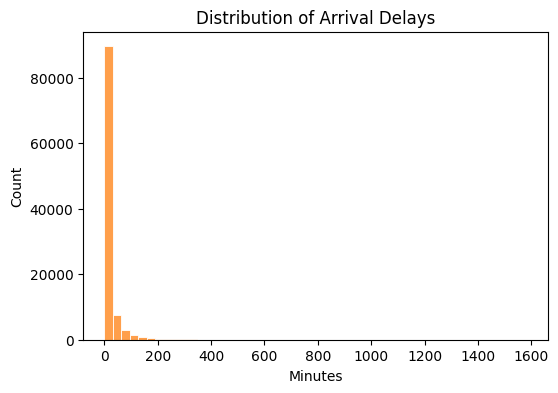

In [23]:
plt.figure(figsize=(6, 4))

sns.histplot(
    df["arrival_delay_in_minutes"],
    bins=50,
    color=ORANGE,
    edgecolor="white"
)

plt.title("Distribution of Arrival Delays")
plt.xlabel("Minutes")
plt.ylabel("Count")

file_path = FIGURES_DIR / "arrival_delay_distribution.png"
plt.savefig(file_path, dpi=300, bbox_inches="tight")
plt.show()

**Result**: Arrival delays are heavily right-skewed, showing that while most passengers experience minimal delays, rare extreme delays are likely to have a disproportionate impact on satisfaction.

### Departure delay distribution

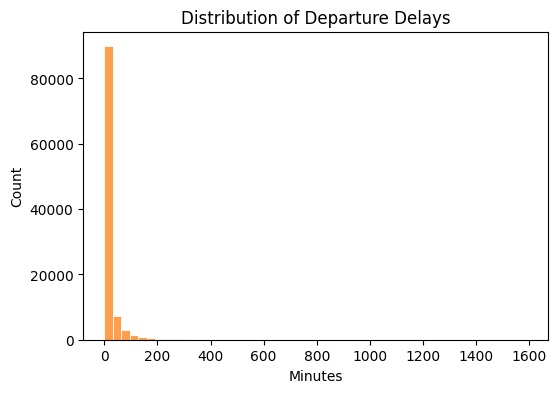

In [24]:
plt.figure(figsize=(6, 4))

sns.histplot(
    df["departure_delay_in_minutes"],
    bins=50,
    color=ORANGE,
    edgecolor="white"
)

plt.title("Distribution of Departure Delays")
plt.xlabel("Minutes")
plt.ylabel("Count")

file_path = FIGURES_DIR / "departure_delay_distribution.png"
plt.savefig(file_path, dpi=300, bbox_inches="tight")
plt.show()



**Result**: Departure delays are highly right-skewed, as most flights experience little or no delay while a small number of extreme delays are likely to have a disproportionate effect on passenger satisfaction.

## 4. RQ1: What really matters to passengers? — Service Quality Impact

### All Services

In [25]:
#With all rating services included
service_columns_all = [
    "inflight_wifi_service",
    "departure_arrival_time_convenient",
    "ease_of_online_booking",
    "gate_location",
    "food_and_drink",
    "online_boarding",
    "seat_comfort",
    "inflight_entertainment",
    "on-board_service",
    "leg_room_service",
    "baggage_handling",
    "checkin_service",
    "inflight_service",
    "cleanliness"
]

In [28]:
avg_service_scores_all = (
    df[service_columns_all]
    .mean()
    .sort_values(ascending=False)
)

avg_service_scores_all


inflight_service                     3.640428
baggage_handling                     3.631833
seat_comfort                         3.439396
on-board_service                     3.382363
inflight_entertainment               3.358158
leg_room_service                     3.351055
checkin_service                      3.304290
cleanliness                          3.286351
online_boarding                      3.250375
food_and_drink                       3.202129
departure_arrival_time_convenient    3.060296
gate_location                        2.976883
ease_of_online_booking               2.756901
inflight_wifi_service                2.729683
dtype: float64

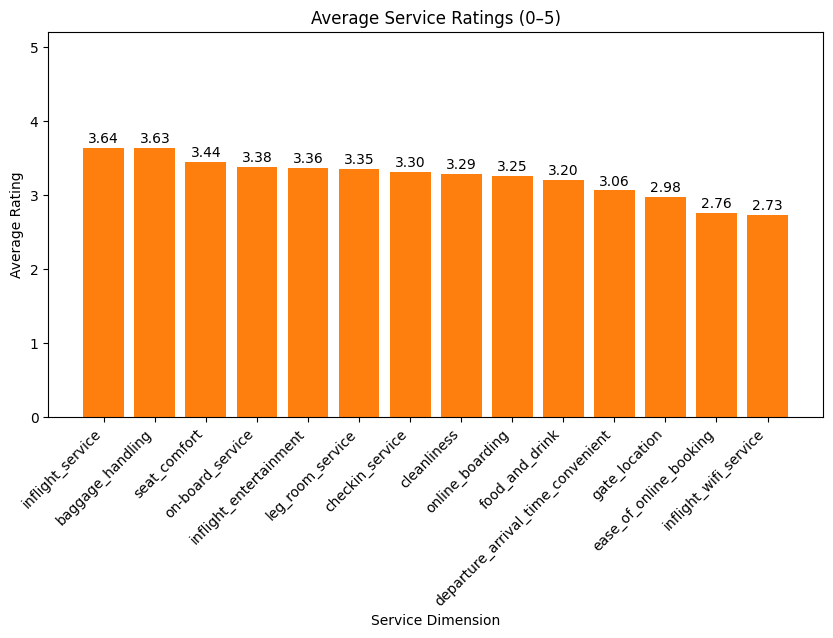

In [29]:
# Plot average service ratings
fig, ax = plt.subplots(figsize=(10, 5))

bars = ax.bar(avg_service_scores_all.index, avg_service_scores_all.values, color=ORANGE)

# Add value labels (2 decimals)
for bar in bars:
    h = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        h + 0.03,
        f"{h:.2f}",
        ha="center",
        va="bottom",
        fontsize=10
    )

# Formatting
ax.set_title("Average Service Ratings (0–5)")
ax.set_xlabel("Service Dimension")
ax.set_ylabel("Average Rating")
ax.set_ylim(0, 5.2)
plt.xticks(rotation=45, ha="right")

# Save
file_path = FIGURES_DIR / "average_service_ratings.png"
plt.savefig(file_path, dpi=300, bbox_inches="tight")

plt.show()


### Defining feature groups

In [30]:
# Service quality features
service_columns = [
    "seat_comfort", "inflight_entertainment", "food_and_drink",
    "on-board_service", "leg_room_service", "cleanliness",
    "checkin_service", "inflight_service"
]

# Operational features
operational_columns = [
    "flight_distance",
    "departure_delay_in_minutes",
    "arrival_delay_in_minutes"
]

# Passenger's segmentation features
segmentation_columns = [
    "customer_type",
    "type_of_travel",
    "class",
    "gender"
]

**Note**: Service quality features were selected to represent the core in-flight experience that airlines can directly control and that passengers consistently evaluate. Additional service-related variables (e.g. digital or ground services) are analyzed separately to avoid diluting the primary service signal

**Result:** The satisfaction variable was transformed into a binary target and key features were grouped into service quality, operational, and passenger segments to enable consistent KPI analysis and comparisons in later steps.

### average service ratings

In [31]:
avg_service_scores = (
    df[service_columns]
    .mean()
    .sort_values(ascending=False)
)

avg_service_scores

inflight_service          3.640428
seat_comfort              3.439396
on-board_service          3.382363
inflight_entertainment    3.358158
leg_room_service          3.351055
checkin_service           3.304290
cleanliness               3.286351
food_and_drink            3.202129
dtype: float64

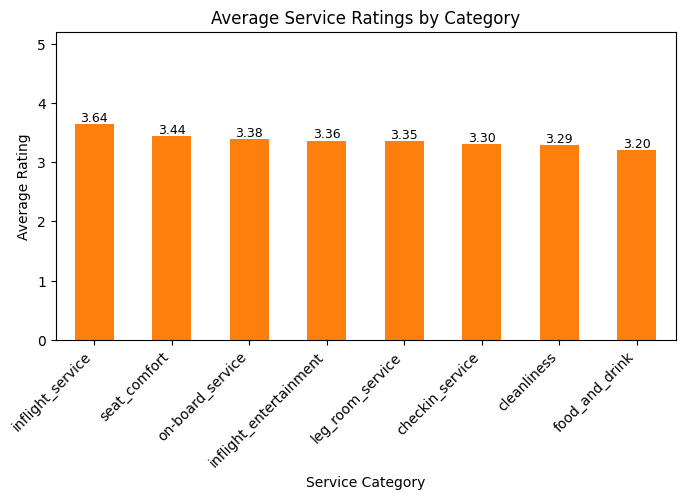

In [33]:
ORANGE = "#ff7f0e"
# Plot
plt.figure(figsize=(8, 4))
ax = avg_service_scores.plot(kind="bar", color=ORANGE)

# Add value labels (2 decimals)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f"{height:.2f}",
        (p.get_x() + p.get_width() / 2, height),
        ha="center",
        va="bottom",
        fontsize=9
    )

# Formatting
plt.title("Average Service Ratings by Category")
plt.xlabel("Service Category")
plt.ylabel("Average Rating")
plt.xticks(rotation=45, ha="right")
plt.ylim(0, 5.2)

# Save figure
file_path = FIGURES_DIR / "average_service_ratings.png"
plt.savefig(file_path, dpi=300, bbox_inches="tight")

plt.show()


**Result**: Average service ratings are relatively similar across categories, with no single service area standing out strongly, indicating that average scores alone are insufficient to identify which services truly drive passenger satisfaction.

### satisfaction rate by service score

To see how passenger satisfaction changes as service quality improves.

In [34]:
seat_impact = (
    df.groupby("seat_comfort")["satisfied"]
      .mean()
      .reset_index()
)
seat_impact

,seat_comfort,satisfied
0,0,0.000000
1,1,0.223188
2,2,0.224139
3,3,0.211543
4,4,0.561152
5,5,0.650208


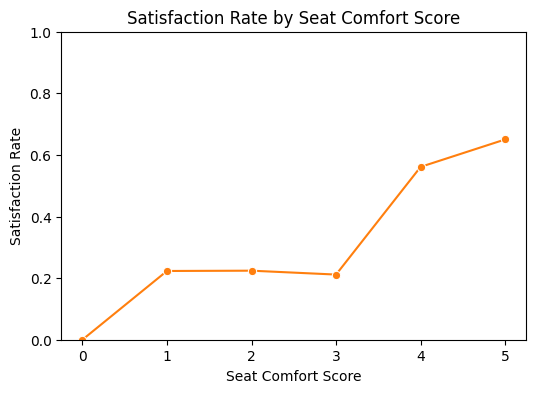

In [35]:
plt.figure(figsize=(6, 4))

sns.lineplot(
    data=seat_impact,
    x="seat_comfort",
    y="satisfied",
    marker="o",
    color=ORANGE
)

plt.title("Satisfaction Rate by Seat Comfort Score")
plt.xlabel("Seat Comfort Score")
plt.ylabel("Satisfaction Rate")
plt.ylim(0, 1)

# Save figure
file_path = FIGURES_DIR / "satisfaction_rate_by_seat_comfort.png"
plt.savefig(file_path, dpi=300, bbox_inches="tight")

plt.show()


**Result**: Passenger satisfaction increases sharply at higher seat comfort scores, with a particularly strong jump from scores 3 to 4, showing that seat comfort has a strong and non-linear impact on passenger satisfaction.

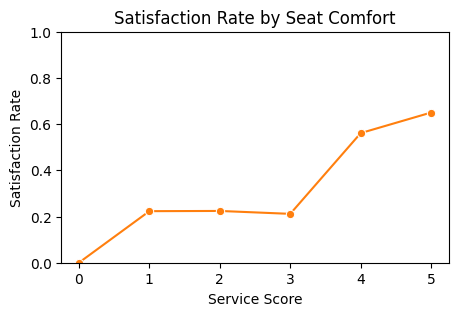

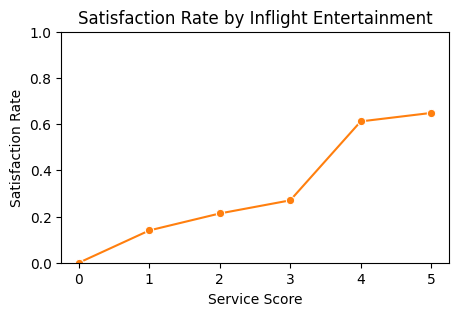

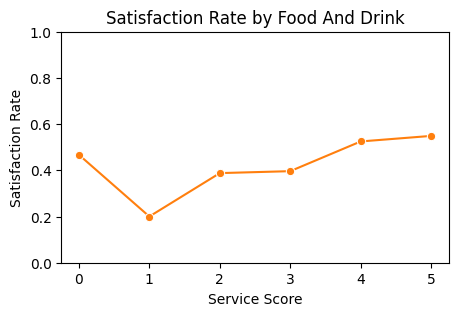

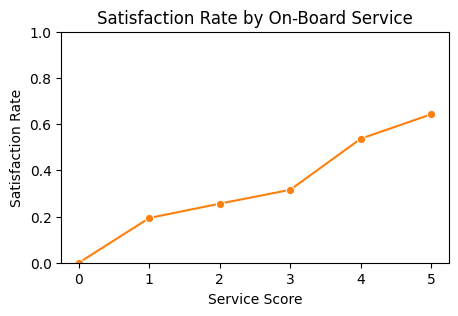

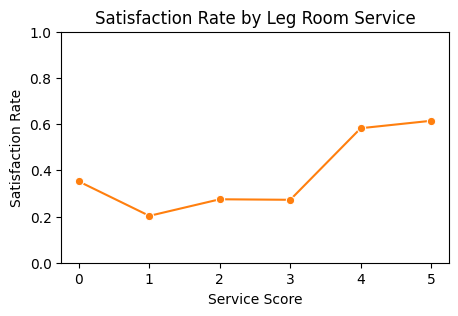

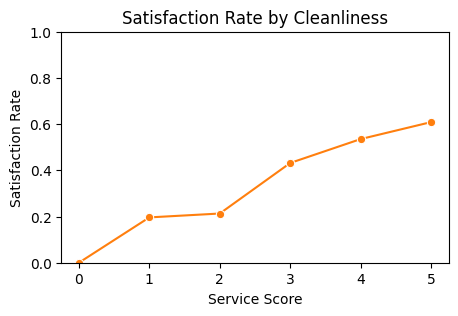

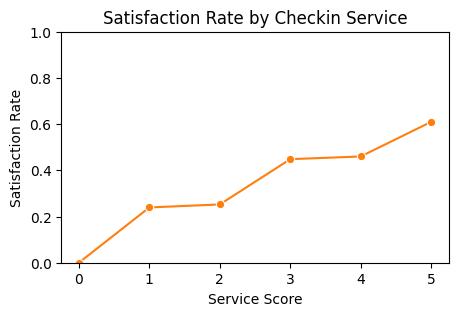

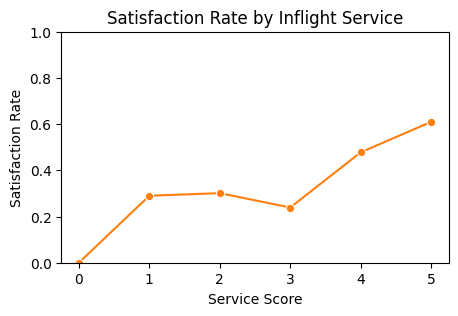

In [36]:
for col in service_columns:
    impact = (
        df.groupby(col)["satisfied"]
          .mean()
          .reset_index()
    )
    
    plt.figure(figsize=(5, 3))
    
    sns.lineplot(
        data=impact,
        x=col,
        y="satisfied",
        marker="o",
        color=ORANGE
    )
    
    plt.title(f"Satisfaction Rate by {col.replace('_', ' ').title()}")
    plt.xlabel("Service Score")
    plt.ylabel("Satisfaction Rate")
    plt.ylim(0, 1)

    # Clean filename
    file_name = f"satisfaction_rate_by_{col}.png"
    file_path = FIGURES_DIR / file_name

    plt.savefig(file_path, dpi=300, bbox_inches="tight")
    plt.show()

**Observation**: While satisfaction increases with higher scores across all service areas, the shape of the relationship differs notably by service type. Comfort-related features such as **seat comfort** and **leg room** show strong threshold effects, where satisfaction rises sharply only once a certain quality level is reached. Service-related factors like **on-board** and **inflight service** display more consistent, linear increases, suggesting a direct and reliable influence on passenger satisfaction. In contrast, food and drink shows a weaker and less stable pattern, indicating that it plays a supporting rather than decisive role. These differences suggest that not all service improvements deliver the same impact, even when average ratings appear similar.

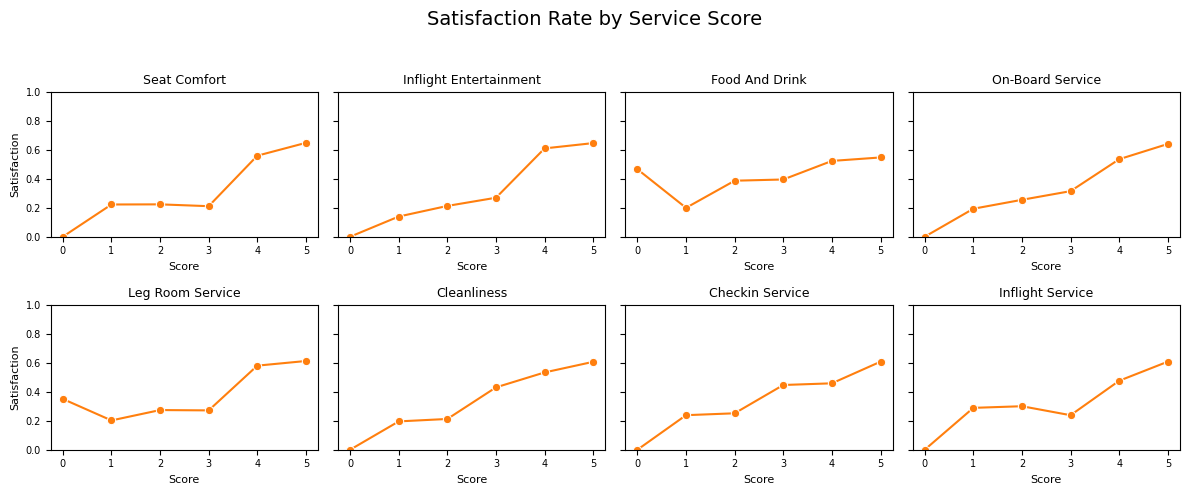

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
import math
from pathlib import Path

# Save path
FIGURES_DIR = Path(r"C:\Users\ghaza\Desktop\Airline_Passenger_Satisfaction_Project\figures")
FIGURES_DIR.mkdir(parents=True, exist_ok=True)

ORANGE = "#ff7f0e"

# Number of plots
n_services = len(service_columns)
n_cols = 4
n_rows = math.ceil(n_services / n_cols)

# Create subplots
fig, axes = plt.subplots(
    n_rows, n_cols,
    figsize=(n_cols * 3, n_rows * 2.5),
    sharey=True
)

axes = axes.flatten()

# Loop through services
for i, col in enumerate(service_columns):
    impact = (
        df.groupby(col)["satisfied"]
          .mean()
          .reset_index()
    )
    
    sns.lineplot(
        data=impact,
        x=col,
        y="satisfied",
        marker="o",
        color=ORANGE,
        ax=axes[i]
    )
    
    axes[i].set_title(col.replace("_", " ").title(), fontsize=9)
    axes[i].set_xlabel("Score", fontsize=8)
    axes[i].set_ylabel("Satisfaction", fontsize=8)
    axes[i].set_ylim(0, 1)
    axes[i].tick_params(labelsize=7)

# Hide empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis("off")

# Overall title
fig.suptitle("Satisfaction Rate by Service Score", fontsize=14)

plt.tight_layout(rect=[0, 0, 1, 0.95])

# Save
file_path = FIGURES_DIR / "satisfaction_rate_by_service_score_all_services.png"
plt.savefig(file_path, dpi=300, bbox_inches="tight")

plt.show()



### Service Impact sumamry

In [39]:
# Service Impact Summary

service_impact_sumamry = []

for col in service_columns:
    high_col = df[col] >= 4
    sat_rate = df.groupby(high_col, observed=True)["satisfied"].mean()
    
    service_impact_sumamry.append({
        "service": col,
        "low_score_satisfaction": sat_rate[False],
        "high_score_satisfaction": sat_rate[True],
        "satisfaction_gap": sat_rate[True] - sat_rate[False]
    })

service_impact_sumamry_df = pd.DataFrame(service_impact_sumamry)
service_impact_sumamry_df.sort_values("satisfaction_gap", ascending=False).reset_index(drop=True).round(2)



,service,low_score_satisfaction,high_score_satisfaction,satisfaction_gap
0,inflight_entertainment,0.22,0.63,0.41
1,seat_comfort,0.22,0.60,0.38
2,leg_room_service,0.26,0.60,0.34
3,on-board_service,0.27,0.58,0.31
4,inflight_service,0.27,0.53,0.27
5,cleanliness,0.31,0.57,0.26
6,food_and_drink,0.35,0.54,0.19
7,checkin_service,0.35,0.52,0.17


- The **low_score_satisfaction** shows the percentage of satisfied passengers when this service is rated low (0–3). -> Only 22% of passengers are satisfied when entertainment is poor/average.
- The **high_score_satisfaction** shows the percentage of satisfied passengers when this service is rated low (4–5). -> 63% of passengers are satisfied when entertainment is good/excellent.
- The difference between high and low satisfaction: (satisfaction gap = high − low). -> Improving inflight entertainment quality is associated with a 41 percentage-point increase in passenger satisfaction.

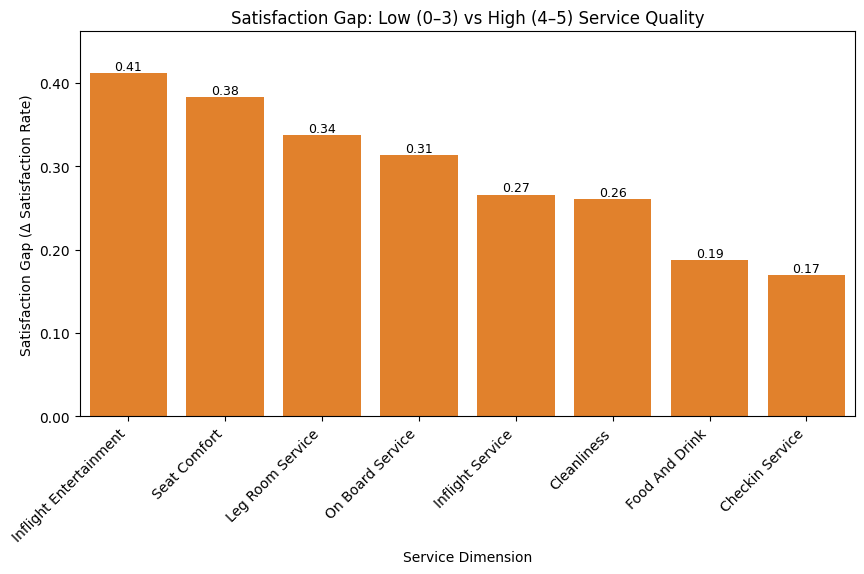

In [41]:
plot_df = service_impact_sumamry_df.copy()

# keep only selected services
plot_df = plot_df[plot_df["service"].isin(service_columns)]

# sort by impact
plot_df = plot_df.sort_values("satisfaction_gap", ascending=False)

# make labels slide-friendly
plot_df["service_label"] = (
    plot_df["service"]
    .str.replace("_", " ", regex=False)
    .str.replace("-", " ", regex=False)
    .str.title()
)

# ================================
# Plot
# ================================
plt.figure(figsize=(10, 5))
ax = sns.barplot(
    data=plot_df,
    x="service_label",
    y="satisfaction_gap",
    color=ORANGE
)

# value labels (2 decimals)
for p in ax.patches:
    h = p.get_height()
    ax.annotate(
        f"{h:.2f}",
        (p.get_x() + p.get_width() / 2, h),
        ha="center",
        va="bottom",
        fontsize=9
    )

# formatting
plt.title("Satisfaction Gap: Low (0–3) vs High (4–5) Service Quality")
plt.xlabel("Service Dimension")
plt.ylabel("Satisfaction Gap (Δ Satisfaction Rate)")
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
plt.xticks(rotation=45, ha="right")

# leave space for labels
plt.ylim(0, plot_df["satisfaction_gap"].max() + 0.05)

# ================================
# Save
# ================================
file_path = FIGURES_DIR / "service_impact_featured_services.png"
plt.savefig(file_path, dpi=300, bbox_inches="tight")

plt.show()

**Result**: The satisfaction gap chart shows that improvements in service quality, especially in inflight entertainment, seat comfort, and leg room—lead to substantially larger increases in passenger satisfaction than other service areas, highlighting that not all service improvements have equal impact.

In [42]:
service_impact_sumamry_all = []

for col in service_columns_all:
    high_col = df[col] >= 4
    sat_rate = df.groupby(high_col, observed=True)["satisfied"].mean()
    
    service_impact_sumamry_all.append({
        "service": col,
        "low_score_satisfaction": sat_rate[False],
        "high_score_satisfaction": sat_rate[True],
        "satisfaction_gap": sat_rate[True] - sat_rate[False]
    })

service_impact_sumamry_all_df = pd.DataFrame(service_impact_sumamry_all)
service_impact_sumamry_all_df.sort_values("satisfaction_gap", ascending=False).reset_index(drop=True).round(2)



,service,low_score_satisfaction,high_score_satisfaction,satisfaction_gap
0,online_boarding,0.15,0.72,0.57
1,inflight_wifi_service,0.30,0.74,0.44
2,inflight_entertainment,0.22,0.63,0.41
3,seat_comfort,0.22,0.60,0.38
4,leg_room_service,0.26,0.60,0.34
5,on-board_service,0.27,0.58,0.31
6,baggage_handling,0.26,0.54,0.27
7,ease_of_online_booking,0.35,0.62,0.27
8,inflight_service,0.27,0.53,0.27
9,cleanliness,0.31,0.57,0.26


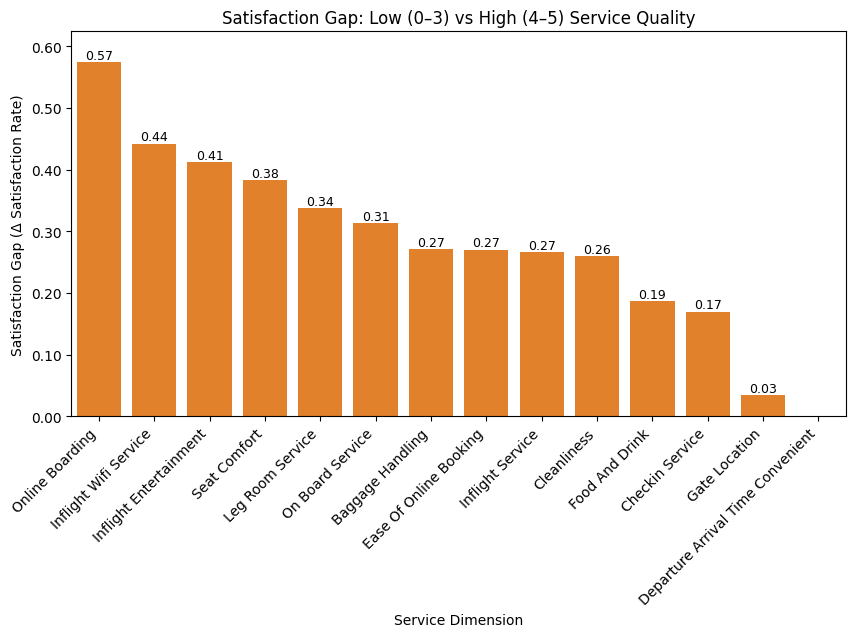

In [43]:
# ---- 1) Filter to the services you want (and drop missing safely)
plot_df = service_impact_sumamry_all_df.copy()

plot_df = plot_df[plot_df["service"].isin(service_columns_all)].copy()

# ---- 2) Sort by impact (most important at top)
plot_df = plot_df.sort_values("satisfaction_gap", ascending=False)

# ---- 3) Make labels slide-friendly
plot_df["service_label"] = (
    plot_df["service"]
    .str.replace("_", " ", regex=False)
    .str.replace("-", " ", regex=False)
    .str.title()
)

# ---- 4) Plot
plt.figure(figsize=(10, 5))
ax = sns.barplot(
    data=plot_df,
    x="service_label",
    y="satisfaction_gap",
    color=ORANGE
)

# ---- 5) Add value labels on bars (2 decimals)
for p in ax.patches:
    h = p.get_height()
    ax.annotate(
        f"{h:.2f}",
        (p.get_x() + p.get_width() / 2, h),
        ha="center",
        va="bottom",
        fontsize=9
    )

# ---- 6) Formatting
plt.title("Satisfaction Gap: Low (0–3) vs High (4–5) Service Quality")
plt.xlabel("Service Dimension")
plt.ylabel("Satisfaction Gap (Δ Satisfaction Rate)")
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
plt.xticks(rotation=45, ha="right")

# Optional: keep some space above bars for labels
ymax = plot_df["satisfaction_gap"].max()
plt.ylim(0, ymax + 0.05)

# ---- 7) Save
file_path = FIGURES_DIR / "service_impact_satisfaction_gap.png"
plt.savefig(file_path, dpi=300, bbox_inches="tight")

plt.show()


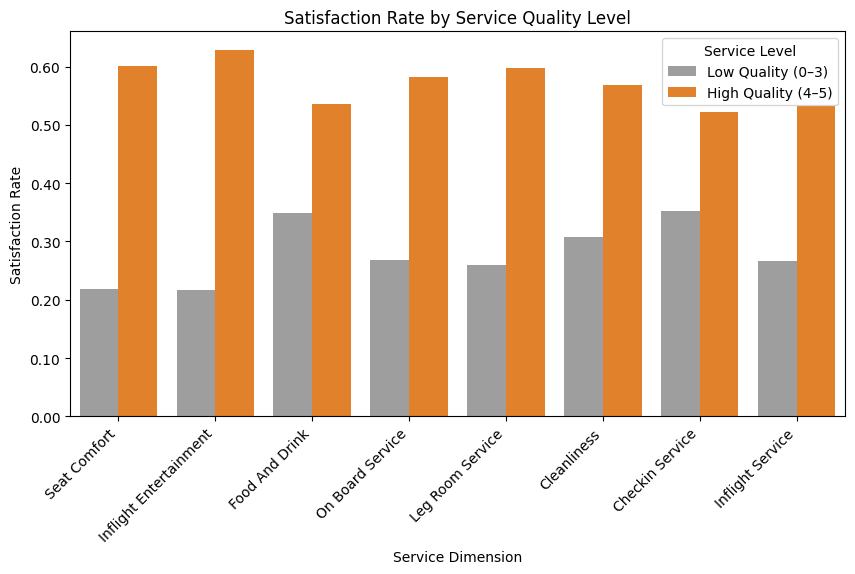

In [44]:
# Filter to the services you want (service_columns)
service_gap_long = (
    service_impact_sumamry_df
    .loc[service_impact_sumamry_df["service"].isin(service_columns)]
    .melt(
        id_vars="service",
        value_vars=["low_score_satisfaction", "high_score_satisfaction"],
        var_name="service_level",
        value_name="satisfaction_rate"
    )
)

# Make labels readable
service_gap_long["service_label"] = (
    service_gap_long["service"]
    .str.replace("_", " ", regex=False)
    .str.replace("-", " ", regex=False)
    .str.title()
)

# Plot
plt.figure(figsize=(10, 5))
ax = sns.barplot(
    data=service_gap_long,
    x="service_label",
    y="satisfaction_rate",
    hue="service_level",
    palette={
        "high_score_satisfaction": ORANGE,
        "low_score_satisfaction": "#9e9e9e"
    }
)

plt.title("Satisfaction Rate by Service Quality Level")
plt.xlabel("Service Dimension")
plt.ylabel("Satisfaction Rate")
plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
plt.xticks(rotation=45, ha="right")

handles, labels = ax.get_legend_handles_labels()
label_map = {
    "low_score_satisfaction": "Low Quality (0–3)",
    "high_score_satisfaction": "High Quality (4–5)"
}
ax.legend(handles=handles, labels=[label_map[l] for l in labels], title="Service Level")

plt.savefig(FIGURES_DIR / "service_quality_low_vs_high.png", dpi=300, bbox_inches="tight")
plt.show()



**Result**:Across all service dimensions, passengers with high service quality ratings show substantially higher satisfaction rates than those with low ratings, with the largest gains observed for inflight entertainment, seat comfort, and leg room service.

### Comparing service quality vs operational impact

Testing H1: Service quality drives satisfaction more than most individual operational metrics.

In [45]:
# Creating delay buckets from passengers percpective
df["delay_bucket"] = pd.cut(
    df["arrival_delay_in_minutes"],
    bins=[-1, 0, 30, 90, df["arrival_delay_in_minutes"].max()],
    labels=["No delay", "Short delay", "Medium delay", "Long delay"]
)


In [46]:
# Satisfaction rate by delay bucket 
delay_impact = (
    df.groupby("delay_bucket", observed=True)["satisfied"]
      .mean()
      .reset_index()
    .round(2)
)
delay_impact

,delay_bucket,satisfied
0,No delay,0.47
1,Short delay,0.40
2,Medium delay,0.36
3,Long delay,0.36


**Result**: Passenger satisfaction decreases once flights are delayed, with the largest drop occurring between on-time and delayed flights; however, additional delay duration beyond this point has a relatively limited effect, and the overall impact of delays is smaller than the satisfaction gains associated with higher service quality.

**Insight**: This suggests that while minimizing delays is important, improvements in service quality may offer greater potential for increasing passenger satisfaction than focusing solely on reducing delay duration.

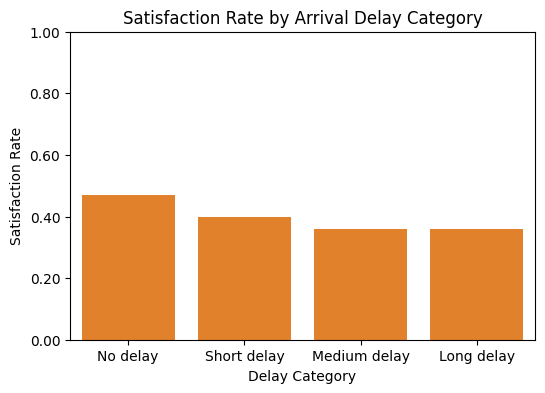

In [47]:
plt.figure(figsize=(6, 4))

ax = sns.barplot(
    data=delay_impact,
    x="delay_bucket",
    y="satisfied",
    color=ORANGE
)

plt.title("Satisfaction Rate by Arrival Delay Category")
plt.xlabel("Delay Category")
plt.ylabel("Satisfaction Rate")
plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
plt.ylim(0, 1)

plt.savefig(FIGURES_DIR / "satisfaction_by_arrival_delay_bucket.png", dpi=300, bbox_inches="tight")
plt.show()


Passenger satisfaction drops once flights are delayed, with the largest decrease occurring between on-time and delayed flights, while longer delays do not substantially reduce satisfaction further.

In [48]:
service_gap_mean_selected = (
    service_impact_sumamry_df
    .loc[service_impact_sumamry_df["service"].isin(service_columns), "satisfaction_gap"]
    .mean()
)

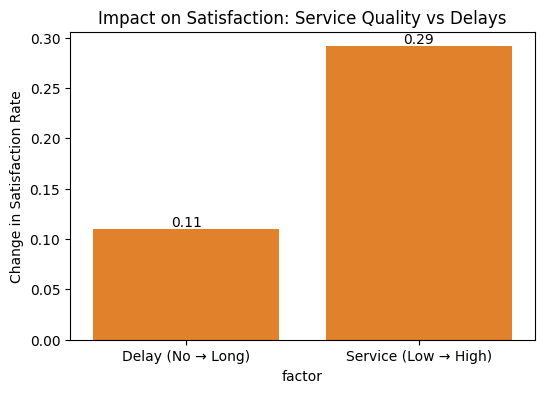

In [49]:
service_gap_mean_selected = (
    service_impact_sumamry_df
    .loc[service_impact_sumamry_df["service"].isin(service_columns), "satisfaction_gap"]
    .mean()
)

comparison_df = pd.DataFrame({
    "factor": ["Delay (No → Long)", "Service (Low → High)"],
    "impact": [
        delay_impact["satisfied"].max() - delay_impact["satisfied"].min(),
        service_gap_mean_selected
    ]
})

plt.figure(figsize=(6, 4))

ax = sns.barplot(
    data=comparison_df,
    x="factor",
    y="impact",
    color=ORANGE
)

plt.title("Impact on Satisfaction: Service Quality vs Delays")
plt.ylabel("Change in Satisfaction Rate")
plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))

# Optional: label values on bars (nice for slides)
for p in ax.patches:
    h = p.get_height()
    ax.annotate(f"{h:.2f}", (p.get_x() + p.get_width()/2, h), ha="center", va="bottom", fontsize=10)

plt.savefig(FIGURES_DIR / "impact_service_vs_delay_selected_services.png", dpi=300, bbox_inches="tight")
plt.show()


Improvements in service quality lead to substantially larger gains in passenger satisfaction than the satisfaction losses associated with flight delays. -> Service quality effect is ~3× larger.

- **H1: Service quality drives satisfaction more than most individual operational metrics.**
- **H1 Conclusion**: The analysis supports H1, showing that service quality has a substantially stronger impact on passenger satisfaction than individual operational metrics such as flight delays. While delays reduce satisfaction by approximately 10–12 percentage points, improvements in key service dimensions increase satisfaction by 30–40 percentage points, indicating that service quality is the dominant driver of passenger satisfaction.

## 5. RQ2: Can high service quality offset the negative impact of delays?

H2: High service quality can partially offset the negative impact of delays.

### overall service quality score

In [50]:
df["service_score"] = df[service_columns].mean(axis=1)

In [51]:
df["service_score"].describe()

count    103904.000000
mean          3.370521
std           0.800547
min           1.000000
25%           2.750000
50%           3.375000
75%           4.000000
max           5.000000
Name: service_score, dtype: float64

**Note**: Service quality was measured using core service ratings on a 1–5 scale; variables containing zero values indicating non-usage were excluded from the service score.

In [52]:
# service quality buckets
df["service_level"] = pd.qcut(
    df["service_score"],
    q=3,
    labels=["Low service", "Medium service", "High service"]
)


In [53]:
df["service_level"].value_counts()

service_level
Low service       37308
Medium service    37001
High service      29595
Name: count, dtype: int64

**Result**: The overall service quality score was divided into low, medium, and high service groups using quantiles, resulting in similarly sized passenger segments that allow for meaningful comparison of satisfaction across different delay categories.

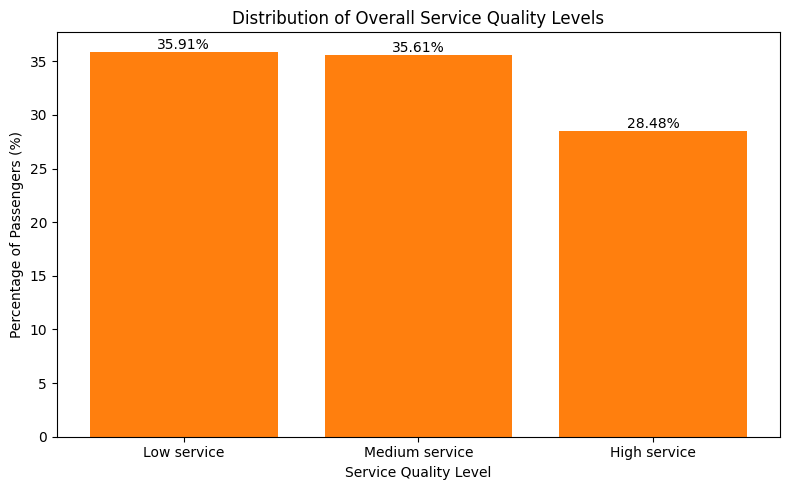

In [62]:
# Count service levels
service_counts = df['service_level'].value_counts().sort_index()

# Convert to percentages
service_percent = service_counts / service_counts.sum() * 100

# Create figure
plt.figure(figsize=(8, 5))

# Bar chart
bars = plt.bar(
    service_percent.index,
    service_percent.values,
    color=ORANGE
)

# Add percentage labels on top of bars (2 decimals max)
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height:.2f}%',
        ha='center',
        va='bottom'
    )

# Titles and labels
plt.title('Distribution of Overall Service Quality Levels')
plt.xlabel('Service Quality Level')
plt.ylabel('Percentage of Passengers (%)')

# Clean layout
plt.tight_layout()

# Save the figure
plt.savefig(FIGURES_DIR / 'overall_service_quality_distribution_percent.png', dpi=300, bbox_inches="tight")

# Show plot
plt.show()


**Result**: This chart shows that high overall service quality is experienced by fewer than one-third of passengers. Most passengers fall into low or medium service categories, which highlights both the opportunity for improvement and the relevance of comparing service quality across different delay scenarios.

### combine service level × delay bucket

In [55]:
# For delayed flights, are passengers with high service quality still more satisfied than those with low service quality?
interaction_df = (
    df.groupby(["delay_bucket", "service_level"], observed=True)["satisfied"]
    .mean()
    .reset_index()
    .round(2)
)

In [56]:
interaction_df

,delay_bucket,service_level,satisfied
0,No delay,Low service,0.20
1,No delay,Medium service,0.50
2,No delay,High service,0.75
3,Short delay,Low service,0.13
4,Short delay,Medium service,0.42
5,Short delay,High service,0.72
6,Medium delay,Low service,0.11
7,Medium delay,Medium service,0.38
8,Medium delay,High service,0.71
9,Long delay,Low service,0.10


**Result**: Across all delay categories, passengers experiencing high service quality consistently report substantially higher satisfaction rates than those with low service quality, indicating that strong service quality can largely offset the negative impact of flight delays.

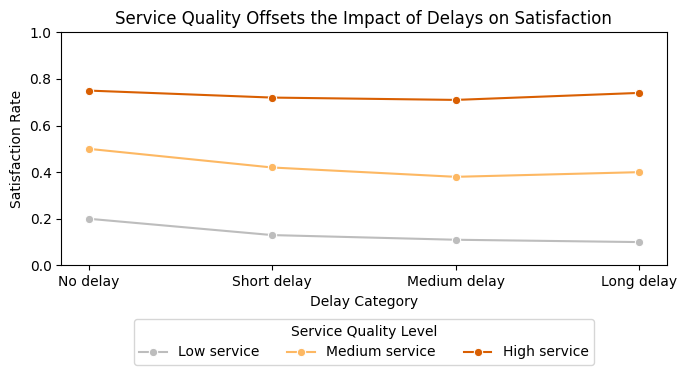

In [63]:
# Define custom color palette
service_palette = {
    "High service": "#d95f02",    # dark orange
    "Medium service": "#fdb863",  # light orange
    "Low service": "#bdbdbd"      # gray
}

fig, ax = plt.subplots(figsize=(7, 4))

sns.lineplot(
    data=interaction_df,
    x="delay_bucket",
    y="satisfied",
    hue="service_level",
    palette=service_palette,
    marker="o",
    ax=ax
)

ax.set_title("Service Quality Offsets the Impact of Delays on Satisfaction")
ax.set_xlabel("Delay Category")
ax.set_ylabel("Satisfaction Rate")
ax.set_ylim(0, 1)

ax.legend(
    title="Service Quality Level",
    loc="upper center",
    bbox_to_anchor=(0.5, -0.2),
    ncol=3
)

plt.tight_layout()
plt.savefig(FIGURES_DIR / 'Service_Quality_Offsets_the_Impact_of_Delays_on_Satisfaction.png', dpi=300, bbox_inches="tight")
plt.show()


**Result**: While passenger satisfaction decreases as delay severity increases, high service quality consistently maintains significantly higher satisfaction levels, demonstrating that strong service can partially offset the negative impact of flight delays.

**Conclusion**: Although delays negatively impact satisfaction, high service quality consistently offsets this effect, supporting the hypothesis that service excellence can mitigate dissatisfaction caused by delays.

## 6. RQ3: Do different passengers value different things?

H3: Satisfaction drivers differ across passenger segments

### Baseline Satisfaction by Passenger Segment

In [58]:
# Satisfaction by Customer Type
customer_type_statistics = (
    df.groupby("customer_type")["satisfied"]
    .mean()
    .reset_index()
    .round(2)
)

customer_type_statistics

,customer_type,satisfied
0,Disloyal Customer,0.24
1,Loyal Customer,0.48


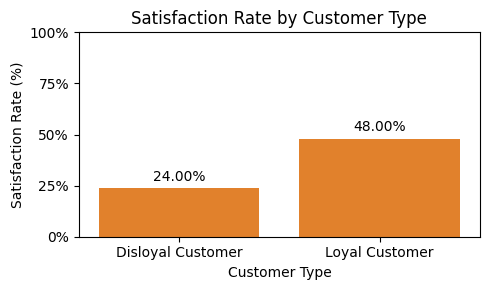

In [64]:
plt.figure(figsize=(5, 3))

ax = sns.barplot(
    data=customer_type_statistics,
    x="customer_type",
    y="satisfied",
    color=ORANGE
)

# Add percentage labels on bars (2 decimals max)
for container in ax.containers:
    ax.bar_label(
        container,
        labels=[f"{v * 100:.2f}%" for v in container.datavalues],
        padding=3
    )

# Titles and labels
plt.title("Satisfaction Rate by Customer Type")
plt.xlabel("Customer Type")
plt.ylabel("Satisfaction Rate (%)")

# Convert y-axis to percent scale
plt.ylim(0, 1)
plt.yticks(
    ticks=[0, 0.25, 0.5, 0.75, 1.0],
    labels=["0%", "25%", "50%", "75%", "100%"]
)

# Clean layout
plt.tight_layout()

# Save figure
plt.savefig(FIGURES_DIR / "satisfaction_by_Customer_type.png", dpi=300, bbox_inches="tight")

plt.show()


**Result**:Loyal customers are significantly more satisfied than disloyal customers, with nearly twice the satisfaction rate, indicating that customer loyalty strongly influences perceived experience.

In [65]:
# Satisfaction by Type of Travel
travel_type_statistics = (
    df.groupby("type_of_travel")["satisfied"]
    .mean()
    .reset_index()
    .round(2)
)

travel_type_statistics


,type_of_travel,satisfied
0,Business Travel,0.58
1,Personal Travel,0.10


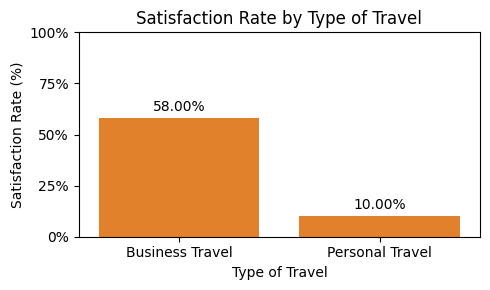

In [66]:
plt.figure(figsize=(5, 3))

ax = sns.barplot(
    data=travel_type_statistics,
    x="type_of_travel",
    y="satisfied",
    color=ORANGE
)

# Add percentage labels on bars (2 decimals max)
for container in ax.containers:
    ax.bar_label(
        container,
        labels=[f"{v * 100:.2f}%" for v in container.datavalues],
        padding=3
    )

# Titles and labels
plt.title("Satisfaction Rate by Type of Travel")
plt.xlabel("Type of Travel")
plt.ylabel("Satisfaction Rate (%)")

# Convert y-axis to percent scale
plt.ylim(0, 1)
plt.yticks(
    ticks=[0, 0.25, 0.5, 0.75, 1.0],
    labels=["0%", "25%", "50%", "75%", "100%"]
)

# Clean layout
plt.tight_layout()

# Save figure
plt.savefig(FIGURES_DIR / "satisfaction_by_travel_type.png", dpi=300, bbox_inches="tight")

plt.show()


**Result**: Satisfaction levels differ markedly between business and personal travelers, with business travelers being significantly more satisfied.

Satisfaction levels differ markedly between business and personal travelers, with business travelers being significantly more satisfied.

In [67]:
# Satisfaction by Travel Class
class_statistics = (
    df.groupby("class")["satisfied"]
    .mean()
    .reset_index()
    .round(2)
)

class_statistics

,class,satisfied
0,Business,0.69
1,Eco,0.19
2,Eco Plus,0.25


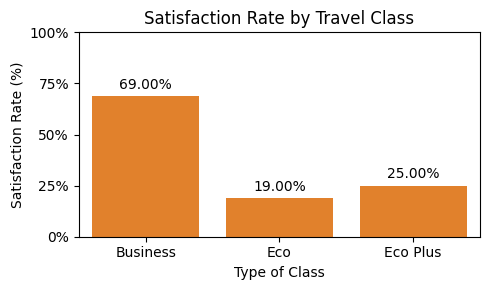

In [68]:
plt.figure(figsize=(5, 3))

ax = sns.barplot(
    data=class_statistics,
    x="class",
    y="satisfied",
    color=ORANGE
)

# Add percentage labels on bars (2 decimals max)
for container in ax.containers:
    ax.bar_label(
        container,
        labels=[f"{v * 100:.2f}%" for v in container.datavalues],
        padding=3
    )

# Titles and labels
plt.title("Satisfaction Rate by Travel Class")
plt.xlabel("Type of Class")
plt.ylabel("Satisfaction Rate (%)")

# Convert y-axis to percent scale
plt.ylim(0, 1)
plt.yticks(
    ticks=[0, 0.25, 0.5, 0.75, 1.0],
    labels=["0%", "25%", "50%", "75%", "100%"]
)

# Clean layout
plt.tight_layout()

# Save figure
plt.savefig(FIGURES_DIR / "satisfaction_by_class_type.png", dpi=300, bbox_inches="tight")

plt.show()


**Result**:Passenger satisfaction increases with travel class, with business-class passengers reporting the highest satisfaction levels.

### Segment-Specific Delay Tolerance

To answer the quetsion: Do different passenger segments react differently to flight delays?

In [69]:
# Delay Tolerance by Customer Type
delay_customer_type = (
    df.groupby(
        ["delay_bucket", "customer_type"],
        observed=True
    )["satisfied"]
    .mean()
    .reset_index()
    .round(2)
)

delay_customer_type

,delay_bucket,customer_type,satisfied
0,No delay,Disloyal Customer,0.26
1,No delay,Loyal Customer,0.52
2,Short delay,Disloyal Customer,0.21
3,Short delay,Loyal Customer,0.44
4,Medium delay,Disloyal Customer,0.19
5,Medium delay,Loyal Customer,0.39
6,Long delay,Disloyal Customer,0.18
7,Long delay,Loyal Customer,0.40


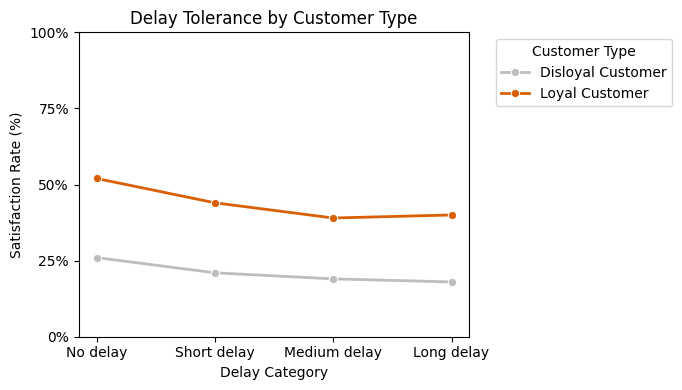

In [70]:
# 1) Color mapping (edit names if your category text differs)
palette = {
    "Loyal Customer": "#d95f02",     # dark orange
    "Disloyal Customer": "#bdbdbd"   # gray
}

fig, ax = plt.subplots(figsize=(7, 4))

sns.lineplot(
    data=delay_customer_type,
    x="delay_bucket",
    y="satisfied",
    hue="customer_type",
    palette=palette,
    marker="o",
    linewidth=2,
    ax=ax
)

# 2) Titles and labels
ax.set_title("Delay Tolerance by Customer Type")
ax.set_xlabel("Delay Category")
ax.set_ylabel("Satisfaction Rate (%)")

# 3) Percent y-axis (0–100)
ax.set_ylim(0, 1)
ax.set_yticks([0, 0.25, 0.5, 0.75, 1.0])
ax.set_yticklabels(["0%", "25%", "50%", "75%", "100%"])

# 5) Legend placement
ax.legend(title="Customer Type", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()

# 6) Save (slide-ready)
plt.savefig(FIGURES_DIR / "delay_tolerance_by_customer_type.png", dpi=300, bbox_inches="tight")

plt.show()


**Result**: Loyal customers remain consistently more satisfied than disloyal customers across all delay categories, indicating greater tolerance to delays among loyal passengers

In [71]:
# Delay Tolerance by Type of Travel
delay_travel_type = (
    df.groupby(
        ["delay_bucket", "type_of_travel"],
        observed=True
    )["satisfied"]
    .mean()
    .reset_index()
    .round(2)
)

delay_travel_type


,delay_bucket,type_of_travel,satisfied
0,No delay,Business Travel,0.63
1,No delay,Personal Travel,0.13
2,Short delay,Business Travel,0.54
3,Short delay,Personal Travel,0.07
4,Medium delay,Business Travel,0.50
5,Medium delay,Personal Travel,0.04
6,Long delay,Business Travel,0.49
7,Long delay,Personal Travel,0.05


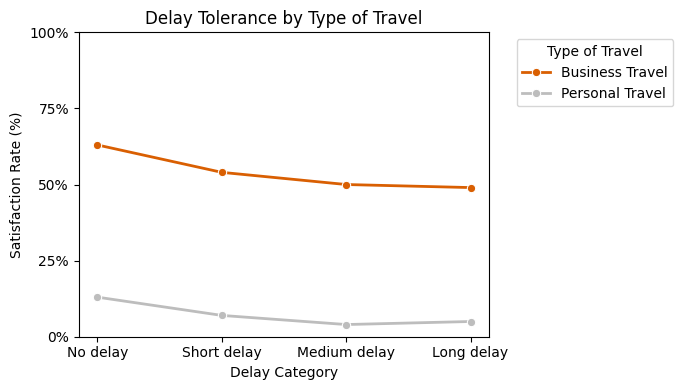

In [72]:
# Color mapping (adjust text if needed)
palette = {
    "Business Travel": "#d95f02",   # dark orange
    "Personal Travel": "#bdbdbd"    # gray
}

fig, ax = plt.subplots(figsize=(7, 4))

sns.lineplot(
    data=delay_travel_type,
    x="delay_bucket",
    y="satisfied",
    hue="type_of_travel",
    palette=palette,
    marker="o",
    linewidth=2,
    ax=ax
)

# Titles and labels
ax.set_title("Delay Tolerance by Type of Travel")
ax.set_xlabel("Delay Category")
ax.set_ylabel("Satisfaction Rate (%)")

# Percent y-axis
ax.set_ylim(0, 1)
ax.set_yticks([0, 0.25, 0.5, 0.75, 1.0])
ax.set_yticklabels(["0%", "25%", "50%", "75%", "100%"])

# Legend
ax.legend(title="Type of Travel", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()

# Save (slide-ready)
plt.savefig(FIGURES_DIR / "delay_tolerance_by_travel_type.png", dpi=300, bbox_inches="tight")

plt.show()


**Result**: Business travelers remain substantially more satisfied than personal travelers across all delay categories, showing significantly higher tolerance to flight delays.

In [73]:
# Delay Tolerance by Travel Class
delay_class = (
    df.groupby(
        ["delay_bucket", "class"],
        observed=True
    )["satisfied"]
    .mean()
    .reset_index()
    .round(2)
)

delay_class

,delay_bucket,class,satisfied
0,No delay,Business,0.73
1,No delay,Eco,0.22
2,No delay,Eco Plus,0.29
3,Short delay,Business,0.66
4,Short delay,Eco,0.15
5,Short delay,Eco Plus,0.21
6,Medium delay,Business,0.63
7,Medium delay,Eco,0.12
8,Medium delay,Eco Plus,0.14
9,Long delay,Business,0.62


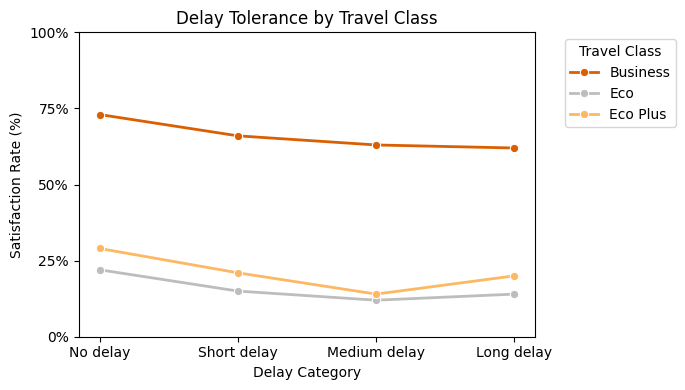

In [74]:
# Color mapping (edit labels if needed)
palette = {
    "Business": "#d95f02",     # dark orange
    "Eco Plus": "#fdb863",     # light orange
    "Eco": "#bdbdbd"           # gray
}

fig, ax = plt.subplots(figsize=(7, 4))

sns.lineplot(
    data=delay_class,
    x="delay_bucket",
    y="satisfied",
    hue="class",
    palette=palette,
    marker="o",
    linewidth=2,
    ax=ax
)

# Titles and labels
ax.set_title("Delay Tolerance by Travel Class")
ax.set_xlabel("Delay Category")
ax.set_ylabel("Satisfaction Rate (%)")

# Percent y-axis
ax.set_ylim(0, 1)
ax.set_yticks([0, 0.25, 0.5, 0.75, 1.0])
ax.set_yticklabels(["0%", "25%", "50%", "75%", "100%"])

# Legend
ax.legend(title="Travel Class", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()

# Save (slide-ready)
plt.savefig(FIGURES_DIR / "delay_tolerance_by_travel_class.png", dpi=300, bbox_inches="tight")

plt.show()


**Result**: Business-class passengers maintain high satisfaction across all delay categories, while economy and eco-plus passengers show substantially lower satisfaction and greater sensitivity to delays.

### Segment-Specific Delay Tolerance

To answer: Do different passenger segments care about different service dimensions?

In [75]:
# Satisfaction Gap by Service × Customer Type
service_by_customer = []

for col in service_columns:
    high_col = df[col] > 4
    
    gap_table = (
        df.groupby(["customer_type", high_col], observed=True)["satisfied"]
        .mean()
        .unstack()
    )
    
    for customer in gap_table.index:
        service_by_customer.append({
            "customer_type": customer,
            "service": col,
            "satisfaction_gap": gap_table.loc[customer, True] - gap_table.loc[customer, False]
        })

service_by_customer_df = (
    pd.DataFrame(service_by_customer)
    .sort_values("satisfaction_gap", ascending=False)
    .round(2)
)

service_by_customer_df


,customer_type,service,satisfaction_gap
1,Loyal Customer,seat_comfort,0.33
3,Loyal Customer,inflight_entertainment,0.32
7,Loyal Customer,on-board_service,0.28
9,Loyal Customer,leg_room_service,0.28
11,Loyal Customer,cleanliness,0.26
15,Loyal Customer,inflight_service,0.24
13,Loyal Customer,checkin_service,0.23
14,Disloyal Customer,inflight_service,0.21
6,Disloyal Customer,on-board_service,0.17
12,Disloyal Customer,checkin_service,0.17


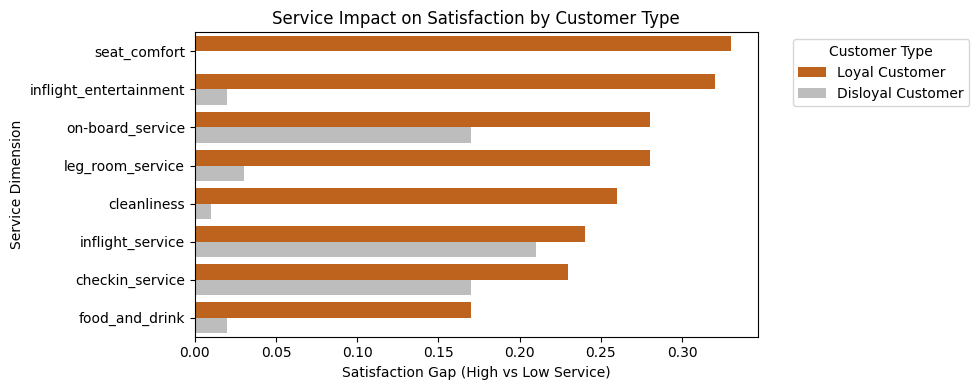

In [76]:
# Color mapping (match exact category names)
palette = {
    "Loyal Customer": "#d95f02",     # dark orange
    "Disloyal Customer": "#bdbdbd"   # gray
}

plt.figure(figsize=(10, 4))

ax = sns.barplot(
    data=service_by_customer_df,
    x="satisfaction_gap",
    y="service",
    hue="customer_type",
    palette=palette,
    orient="h"
)

# Titles and labels
plt.title("Service Impact on Satisfaction by Customer Type")
plt.xlabel("Satisfaction Gap (High vs Low Service)")
plt.ylabel("Service Dimension")

# Legend (clean placement)
plt.legend(
    title="Customer Type",
    bbox_to_anchor=(1.05, 1),
    loc="upper left"
)

plt.tight_layout()

# Save (slide + GitHub ready)
plt.savefig(
    FIGURES_DIR / 
    "service_impact_by_customer_type.png",
    dpi=300,
    bbox_inches="tight"
)

plt.show()

**Result**: The larger the satisfaction gap, the more that service matters for that segment. Loyal customers show strong satisfaction gains from improvements in comfort and onboard experience, while disloyal customers exhibit weaker and more limited responses to service quality changes. 

In [77]:
# Satisfaction Gap by Service × Type of Travel
service_by_travel = []

for col in service_columns:
    high_col = df[col] > 4

    gap_table = (
        df.groupby(["type_of_travel", high_col], observed=True)["satisfied"]
        .mean()
        .unstack()
    )

    for travel in gap_table.index:
        service_by_travel.append({
            "type_of_travel": travel,
            "service": col,
            "satisfaction_gap": gap_table.loc[travel, True] - gap_table.loc[travel, False]
        })

service_by_travel_df = (
    pd.DataFrame(service_by_travel)
    .sort_values("satisfaction_gap", ascending=False)
    .round(2)
)

service_by_travel_df

,type_of_travel,service,satisfaction_gap
0,Business Travel,seat_comfort,0.37
6,Business Travel,on-board_service,0.36
14,Business Travel,inflight_service,0.35
2,Business Travel,inflight_entertainment,0.35
12,Business Travel,checkin_service,0.33
10,Business Travel,cleanliness,0.30
8,Business Travel,leg_room_service,0.24
4,Business Travel,food_and_drink,0.19
9,Personal Travel,leg_room_service,0.05
5,Personal Travel,food_and_drink,0.01


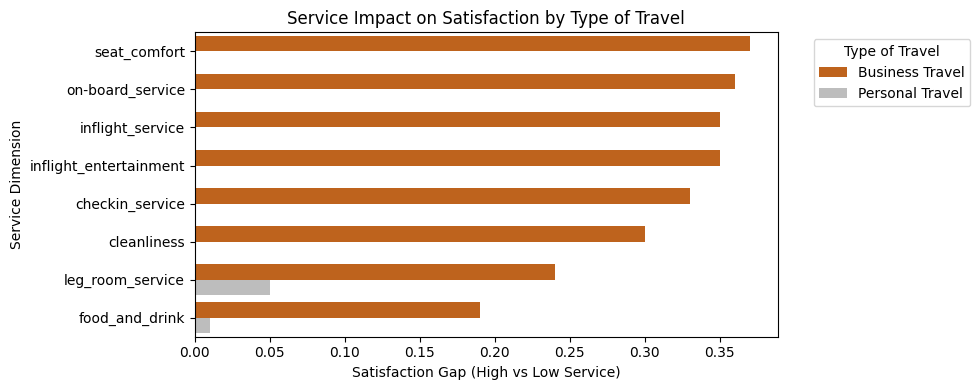

In [78]:
# Color mapping (match exact category names in your dataframe)
palette = {
    "Business Travel": "#d95f02",   # dark orange
    "Personal Travel": "#bdbdbd"    # gray
}

plt.figure(figsize=(10, 4))

ax = sns.barplot(
    data=service_by_travel_df,
    x="satisfaction_gap",
    y="service",
    hue="type_of_travel",
    palette=palette,
    orient="h"
)

# Titles and labels
plt.title("Service Impact on Satisfaction by Type of Travel")
plt.xlabel("Satisfaction Gap (High vs Low Service)")
plt.ylabel("Service Dimension")

# Legend placement
plt.legend(
    title="Type of Travel",
    bbox_to_anchor=(1.05, 1),
    loc="upper left"
)

plt.tight_layout()

# Save (slide & GitHub ready)
plt.savefig(
    FIGURES_DIR / 
    "service_impact_by_travel_type.png",
    dpi=300,
    bbox_inches="tight"
)

plt.show()

**Result**: Service quality improvements have a much stronger impact on satisfaction for business travelers than for personal travelers.

In [79]:
# Satisfaction Gap by Service × Class
service_by_class = []

for col in service_columns:
    high_col = df[col] > 4

    gap_table = (
        df.groupby(["class", high_col], observed=True)["satisfied"]
        .mean()
        .unstack()
    )

    for cls in gap_table.index:
        service_by_class.append({
            "class": cls,
            "service": col,
            "satisfaction_gap": gap_table.loc[cls, True] - gap_table.loc[cls, False]
        })

service_by_class_df = (
    pd.DataFrame(service_by_class)
    .sort_values("satisfaction_gap", ascending=False)
    .round(2)
)

service_by_class_df

,class,service,satisfaction_gap
0,Business,seat_comfort,0.32
3,Business,inflight_entertainment,0.30
9,Business,on-board_service,0.27
15,Business,cleanliness,0.26
5,Eco Plus,inflight_entertainment,0.26
12,Business,leg_room_service,0.25
21,Business,inflight_service,0.25
18,Business,checkin_service,0.23
17,Eco Plus,cleanliness,0.22
8,Eco Plus,food_and_drink,0.21


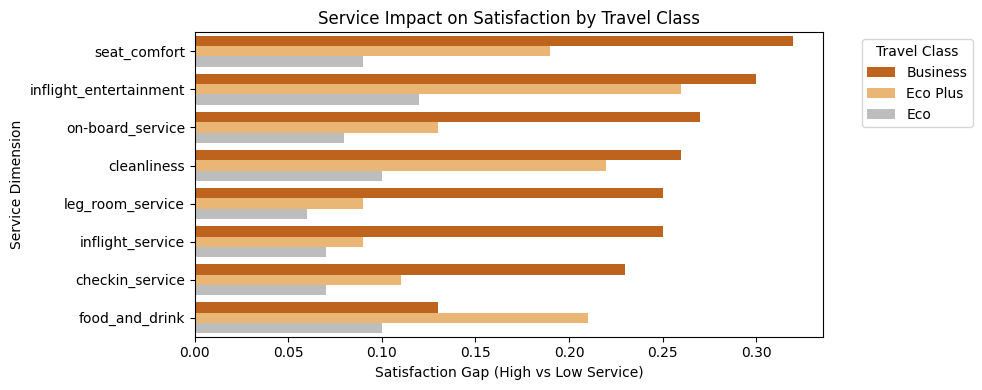

In [80]:
# Color mapping (make sure labels match your dataframe exactly)
palette = {
    "Business": "#d95f02",   # dark orange
    "Eco Plus": "#fdb863",   # light orange
    "Eco": "#bdbdbd"         # gray
}

plt.figure(figsize=(10, 4))

ax = sns.barplot(
    data=service_by_class_df,
    x="satisfaction_gap",
    y="service",
    hue="class",
    palette=palette,
    orient="h"
)

# Titles and labels
plt.title("Service Impact on Satisfaction by Travel Class")
plt.xlabel("Satisfaction Gap (High vs Low Service)")
plt.ylabel("Service Dimension")

# Legend placement
plt.legend(
    title="Travel Class",
    bbox_to_anchor=(1.05, 1),
    loc="upper left"
)

plt.tight_layout()

# Save (slide & GitHub ready)
plt.savefig(FIGURES_DIR / 
    "service_impact_by_travel_class.png",
    dpi=300,
    bbox_inches="tight"
)

plt.show()

Reminder: satisfaction_gap = satisfaction(high service) − satisfaction(low service)

**Result**: Service quality improvements have the strongest impact on satisfaction for Business-class passengers, while Economy passengers show much smaller satisfaction gains from the same service upgrades.

**Conclusion**: Passenger satisfaction varies significantly by segment, with premium and loyal passengers benefiting most from service quality improvements, while Economy and personal travelers are more sensitive to delays than to incremental service enhancements.

## 7. RQ4: Are Airlines Investing in the Right Service Improvements? (Low ROI Service Analysis)

H4 — Not all service improvements deliver meaningful returns

### Average Service Score vs Satisfaction Impact

In [82]:
# Service Performance vs Impact
service_summary = []

for col in service_columns:
    avg_score = df[col].mean()
    
    high_service = df[col] > 4
    sat_gap = (
        df.groupby(high_service)["satisfied"]
        .mean()
        .loc[True] -
        df.groupby(high_service)["satisfied"]
        .mean()
        .loc[False]
    )
    
    service_summary.append({
        "service": col,
        "avg_service_score": round(avg_score, 2),
        "satisfaction_gap": round(sat_gap, 2)
    })

service_summary_df = pd.DataFrame(service_summary)
service_summary_df

,service,avg_service_score,satisfaction_gap
0,seat_comfort,3.44,0.29
1,inflight_entertainment,3.36,0.28
2,food_and_drink,3.20,0.15
3,on-board_service,3.38,0.27
4,leg_room_service,3.35,0.24
5,cleanliness,3.29,0.22
6,checkin_service,3.30,0.22
7,inflight_service,3.64,0.24


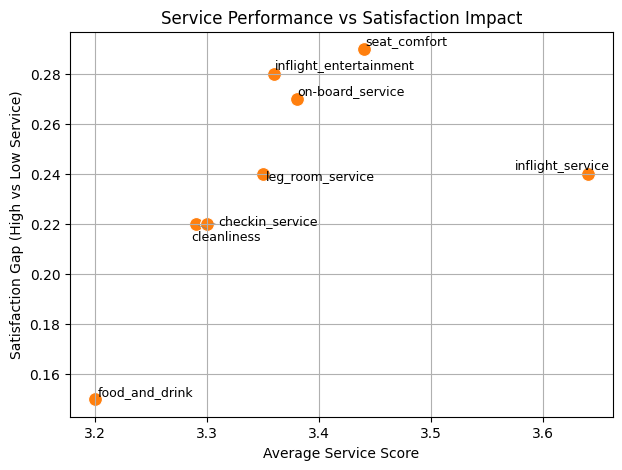

In [83]:
from adjustText import adjust_text

plt.figure(figsize=(7, 5))

sns.scatterplot(
    data=service_summary_df,
    x="avg_service_score",
    y="satisfaction_gap",
    s=100,
    color=ORANGE
)

texts = []
for i, row in service_summary_df.iterrows():
    texts.append(
        plt.text(
            row["avg_service_score"],
            row["satisfaction_gap"],
            row["service"],
            fontsize=9
        )
    )

adjust_text(
    texts,
    arrowprops=dict(arrowstyle="-", color="gray", lw=0.5)
)

plt.title("Service Performance vs Satisfaction Impact")
plt.xlabel("Average Service Score")
plt.ylabel("Satisfaction Gap (High vs Low Service)")
plt.grid(True)
plt.savefig(FIGURES_DIR / 
    "service_performance_vs_satisfaction_impact.png",
    dpi=300,
    bbox_inches="tight"
)
plt.show()

**Result**: Comparing average service performance with satisfaction impact reveals diminishing returns for some services, indicating that improvements in seat comfort and inflight entertainment are more effective at increasing satisfaction than further investment in already well-rated areas such as food and drink or cleanliness.

## 8. RQ5: Can dissatisfaction be predicted early?

H5 — Dissatisfaction can be predicted before the journey ends

This analysis compares service ratings between satisfied and dissatisfied passengers to identify leading indicators of passenger dissatisfaction.

In [84]:
# Defining “Dissatisfaction Risk”
df["dissatisfied"] = 1 - df["satisfied"]

A binary dissatisfaction flag was created to explicitly identify passengers at risk of dissatisfaction, enabling early-risk analysis.

In [85]:
df[["satisfied", "dissatisfied"]].head()

,satisfied,dissatisfied
0,0,1
1,0,1
2,1,0
3,0,1
4,1,0


### Identify Leading Indicators of Passenger Dissatisfaction

In [86]:
# Compare key variables by dissatisfaction status
early_warning_service = (
    df.groupby("dissatisfied")[service_columns]
    .mean()
    .T
    .round(2)
)

early_warning_service

dissatisfied,0,1
seat_comfort,3.97,3.04
inflight_entertainment,3.96,2.89
food_and_drink,3.52,2.96
on-board_service,3.86,3.02
leg_room_service,3.82,2.99
cleanliness,3.74,2.94
checkin_service,3.65,3.04
inflight_service,3.97,3.39


**Result**: Dissatisfied passengers consistently report lower service ratings across all service dimensions, with the largest gaps observed in seat comfort, inflight entertainment, and on-board service, indicating these as strong leading indicators of dissatisfaction.

In [87]:
# Preparing the gap table
service_gap_df = (
    early_warning_service
    .assign(gap=lambda x: x[0] - x[1])  # satisfied minus dissatisfied
    .sort_values("gap", ascending=False)
)

service_gap_df

dissatisfied,0,1,gap
inflight_entertainment,3.96,2.89,1.07
seat_comfort,3.97,3.04,0.93
on-board_service,3.86,3.02,0.84
leg_room_service,3.82,2.99,0.83
cleanliness,3.74,2.94,0.80
checkin_service,3.65,3.04,0.61
inflight_service,3.97,3.39,0.58
food_and_drink,3.52,2.96,0.56


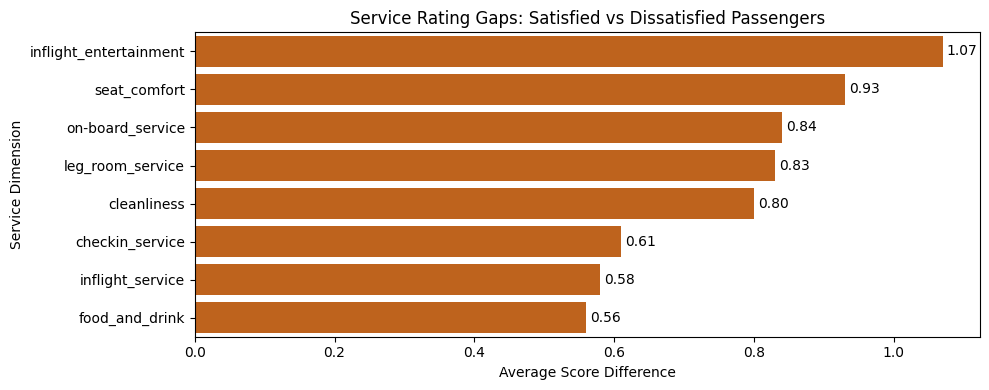

In [88]:
plt.figure(figsize=(10, 4))

ax = sns.barplot(
    data=service_gap_df.reset_index(),
    x="gap",
    y="index",
    color="#d95f02",   # dark orange
    orient="h"
)

# Add value labels to bars
for container in ax.containers:
    ax.bar_label(
        container,
        fmt="%.2f",     # two decimals
        label_type="edge",
        padding=3
    )

# Titles and labels
plt.title("Service Rating Gaps: Satisfied vs Dissatisfied Passengers")
plt.xlabel("Average Score Difference")
plt.ylabel("Service Dimension")

plt.tight_layout()

# Save (slide-ready)
plt.savefig(FIGURES_DIR / 
    "service_rating_gap_with_labels.png",
    dpi=300,
    bbox_inches="tight"
)

plt.show()


**Result**: The largest rating gaps between satisfied and dissatisfied passengers occur in inflight entertainment, seat comfort, and on-board service, indicating that poor performance in these areas is a strong leading indicator of passenger dissatisfaction.

### Flagging High-Risk Passengers Using Rules

To understand: Can we identify passengers who are likely to be dissatisfied early enough to act?

In [89]:
# Defining a simple “High Risk” rule

In [90]:
df["high_risk"] = (
    (df["service_level"] == "Low service") &
    (df["delay_bucket"].isin(["Medium delay", "Long delay"]))
).astype(int)

df["high_risk"].value_counts(normalize=True).round(2)

high_risk
0    0.94
1    0.06
Name: proportion, dtype: float64

Using a simple rule based on low service quality and medium-to-long delays, approximately 6% of passengers are identified as high risk, indicating a focused group suitable for early intervention.

In [91]:
df.groupby("high_risk")["dissatisfied"].mean().round(2)

high_risk
0    0.55
1    0.89
Name: dissatisfied, dtype: float64

Passengers flagged as high risk exhibit a substantially higher dissatisfaction rate (89%) compared to non-risk passengers (55%), demonstrating that dissatisfaction can be identified early using simple, interpretable rules.

**Conclusion** : Passenger dissatisfaction can be predicted with high reliability using simple rule-based indicators derived from service quality and delay information. A small subset of passengers identified as high risk shows a markedly higher likelihood of dissatisfaction, indicating that airlines can proactively intervene before the journey ends to mitigate negative experiences.

## 9. RQ 6: How can airlines turn insight into action?

### Defining improvement strategies

- Strategy A — Broad improvement
Small improvement across all services

- Strategy B — Targeted improvement
Larger improvement in top 3–4 high-impact services

In [92]:
# Ranking services by impact
service_summary_df.sort_values("satisfaction_gap", ascending=False)

,service,avg_service_score,satisfaction_gap
0,seat_comfort,3.44,0.29
1,inflight_entertainment,3.36,0.28
3,on-board_service,3.38,0.27
4,leg_room_service,3.35,0.24
7,inflight_service,3.64,0.24
5,cleanliness,3.29,0.22
6,checkin_service,3.30,0.22
2,food_and_drink,3.20,0.15


In [93]:
# Defining top services
top_services = service_summary_df.sort_values(
    "satisfaction_gap", ascending=False
).head(3)["service"].tolist()

top_services

['seat_comfort', 'inflight_entertainment', 'on-board_service']

In [94]:
# Comparing strategies
strategy_comparison = pd.DataFrame({
    "Strategy": ["Broad improvement", "Targeted improvement"],
    "Services improved": [
        "All services",
        ", ".join(top_services)
    ],
    "Expected satisfaction impact": [
        "Moderate",
        "High"
    ],
    "Efficiency under budget constraints": [
        "Low",
        "High"
    ]
})

strategy_comparison


,Strategy,Services improved,Expected satisfaction impact,Efficiency under budget constraints
0,Broad improvement,All services,Moderate,Low
1,Targeted improvement,"seat_comfort, inflight_entertainment, on-board...",High,High


**Result**: The table compares a broad improvement strategy with a targeted strategy focused on the highest-impact services to evaluate which approach is more effective under budget constraints.

**conclusion**: The analysis shows that targeted investments in a small number of high-impact service areas, such as seat comfort, inflight entertainment, and on-board service, are more effective at improving overall passenger satisfaction than broad improvements across all services under limited budget conditions. Concentrating resources on the highest-impact service dimensions yields greater satisfaction gains than distributing improvements uniformly across all service areas.

In [95]:
df_corr = df.copy()

df_corr["sat_num"] = (
    df_corr["satisfaction"]
    .astype(str)
    .str.strip()
    .str.lower()
    .apply(lambda x: 1 if x == "satisfied" else 0)
)

corr_all = (
    df_corr
    .select_dtypes(include="number")
    .corr(method="spearman")["sat_num"]
    .sort_values(ascending=False)
)

corr_all

satisfied                            1.000000
sat_num                              1.000000
online_boarding                      0.550994
service_score                        0.489121
inflight_entertainment               0.399504
seat_comfort                         0.362199
on-board_service                     0.328301
leg_room_service                     0.318343
cleanliness                          0.303429
inflight_wifi_service                0.287458
baggage_handling                     0.269318
inflight_service                     0.265362
flight_distance                      0.257274
checkin_service                      0.232603
food_and_drink                       0.207237
ease_of_online_booking               0.177121
age                                  0.147145
id                                   0.013749
gate_location                       -0.000137
departure_arrival_time_convenient   -0.049576
departure_delay_in_minutes          -0.067913
arrival_delay_in_minutes          

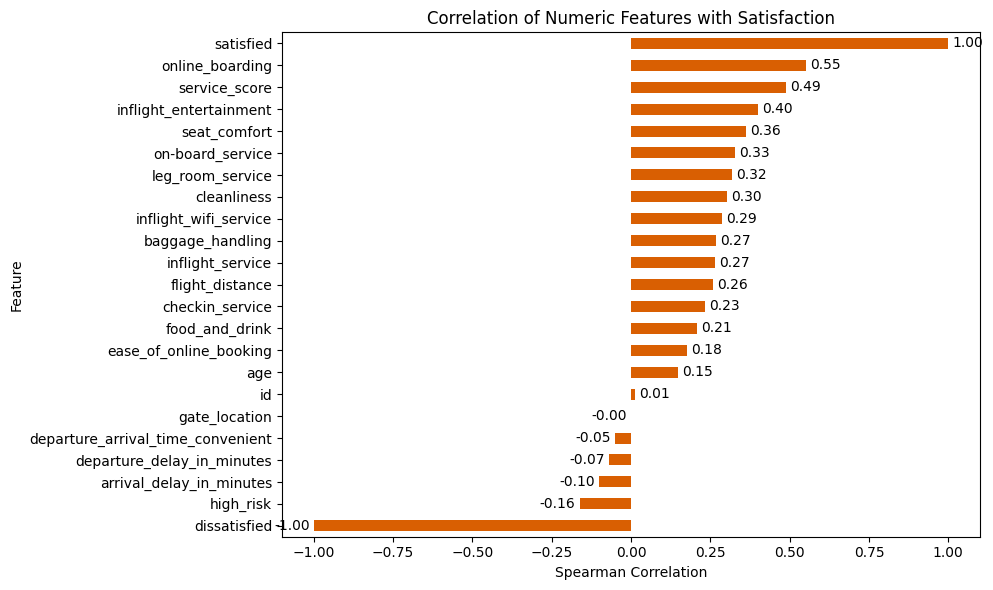

In [96]:
# Prepare data
corr_plot = corr_all.drop("sat_num").sort_values()

plt.figure(figsize=(10, 6))

ax = corr_plot.plot(
    kind="barh",
    color="#d95f02"   # dark orange
)

# Add value labels to bars
for container in ax.containers:
    ax.bar_label(
        container,
        fmt="%.2f",
        label_type="edge",
        padding=3
    )

# Titles and labels
plt.title("Correlation of Numeric Features with Satisfaction")
plt.xlabel("Spearman Correlation")
plt.ylabel("Feature")

# Clean layout
plt.tight_layout()

# Save (slide & GitHub ready)
plt.savefig(
    FIGURES_DIR / 
    "correlation_numeric_features_satisfaction.png",
    dpi=300,
    bbox_inches="tight"
)

plt.show()

In [97]:
# debug block
print("corr_all type:", type(corr_all))
print("corr_all shape:", getattr(corr_all, "shape", None))
print("corr_all index len:", len(corr_all.index) if hasattr(corr_all, "index") else None)
print("corr_all columns len:", len(corr_all.columns) if hasattr(corr_all, "columns") else None)


corr_all type: <class 'pandas.Series'>
corr_all shape: (24,)
corr_all index len: 24
corr_all columns len: None


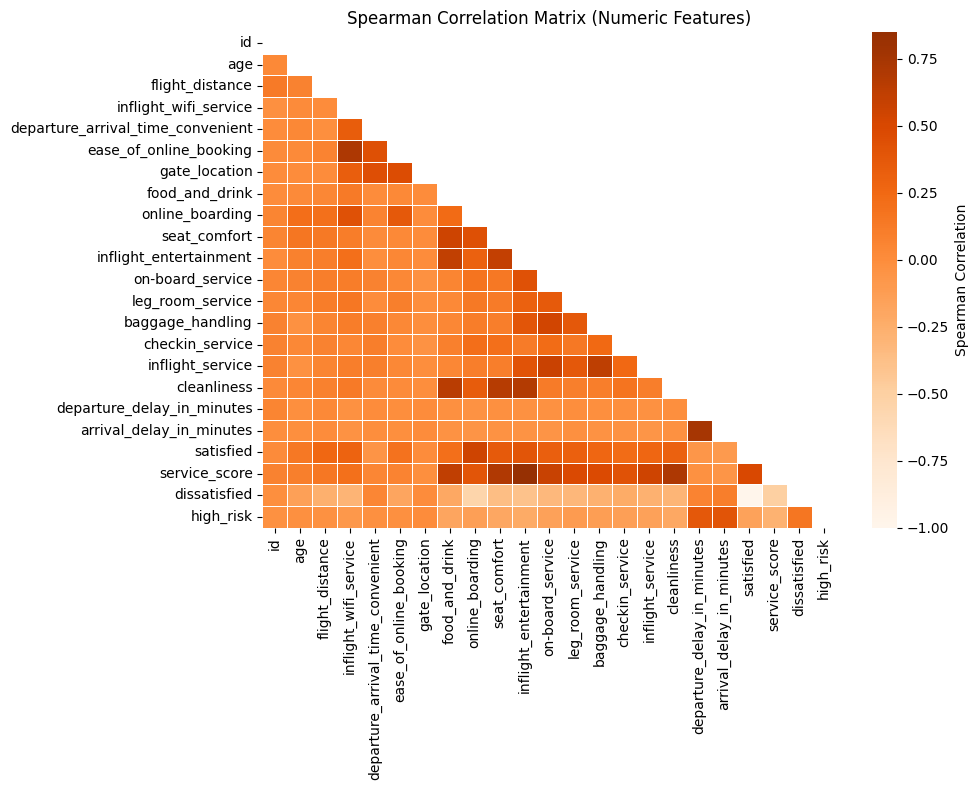

In [98]:
# Create a square correlation matrix from your numeric df (example name: df_numeric)
corr = df.select_dtypes("number").corr(method="spearman")

# Mask built from the SAME object
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    mask=mask,
    cmap="Oranges",
    center=0,
    linewidths=0.5,
    cbar_kws={"label": "Spearman Correlation"}
)
plt.title("Spearman Correlation Matrix (Numeric Features)")
plt.tight_layout()
plt.savefig(
    FIGURES_DIR / 
    "correlation_Matrix.png",
    dpi=300,
    bbox_inches="tight"
)
plt.show()


**Result**: Exploratory correlation analysis shows that service quality variables have the strongest association with passenger satisfaction. Online boarding, inflight entertainment, and seat comfort exhibit the highest positive correlations, while delay-related variables show weaker negative relationships. This suggests that service quality plays a larger role in shaping satisfaction than operational delays or demographic factors.

## 10. Executive Summary

This analysis examines the key drivers of airline passenger satisfaction using survey data, focusing on service quality, delays, and passenger segmentation. The results show that service quality—particularly seat comfort, inflight entertainment, and on-board service—has a stronger and more consistent impact on satisfaction than operational delays alone. While delays reduce satisfaction, high service quality can partially offset their negative effects. Satisfaction levels also vary significantly across customer segments, with loyal, business, and premium-class passengers showing higher tolerance and responsiveness to service improvements. Finally, a targeted improvement strategy focusing on high-impact services is more effective than broad improvements under realistic budget constraints.

-  Service Quality

Service quality is the strongest driver of satisfaction across all analyses.

Seat comfort and inflight entertainment show the largest satisfaction gaps.

-  Delays

Delays reduce satisfaction, especially the transition from no delay → any delay.

Additional delay duration has diminishing negative impact.

-  Service × Delay Interaction

High service quality consistently offsets the negative impact of delays.

Passengers with high service scores remain satisfied even under long delays.

-  Passenger Segments

Loyal and business travelers are significantly more satisfied than disloyal and personal travelers.

Economy passengers are more sensitive to both service quality and delays.

-  Dissatisfaction Risk

Large service rating gaps between satisfied and dissatisfied passengers indicate strong early indicators of dissatisfaction.

Rule-based identification of high-risk passengers shows high alignment with actual dissatisfaction.

-  Strategy

Targeted improvements in high-impact services outperform broad improvement strategies under budget constraints.

## 11. Business Recommendations

- Prioritize improvements in seat comfort, inflight entertainment, and on-board service

- Focus service investments on economy and disloyal passengers

- Use early dissatisfaction signals to trigger service recovery actions

- Allocate budgets using targeted improvement strategies, not uniform upgrades